In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from scipy.stats import norm
from arch import arch_model

In [2]:
df = pd.read_csv('/Users/philiplacava/Projects/DSCI 521/Bubble project/Asset-Price-Bubble-Detection/Merged Monthly Stock Data1.csv')
#df = pd.read_csv("/Users/philiplacava/Projects/DSCI 521/Bubble project/Asset-Price-Bubble-Detection/Merged Monthly Stock Data.csv")


df = df.dropna()
df.tail()


,Date,bovprice,bovreturn,snpprice,snpreturn,election_month,before_election,after_election
299,5/1/99,"11,090",-2.30%,"1,301.80",-2.50%,0.0,0.0,0.0
300,4/1/99,"11,351",6.12%,"1,335.20",3.79%,0.0,0.0,0.0
301,3/1/99,"10,696",20.03%,"1,286.40",3.88%,0.0,0.0,0.0
302,2/1/99,"8,911",9.06%,"1,238.30",-3.23%,0.0,0.0,0.0
303,1/1/99,"8,171",20.45%,"1,279.60",4.10%,0.0,0.0,0.0


In [3]:
# Convert 'bovprice' and 'snpprice' to numeric types
df['bovprice'] = df['bovprice'].str.replace(',', '').astype(float)
df['snpprice'] = df['snpprice'].str.replace(',', '').astype(float)
df['bovreturn'] = df['bovreturn'].str.replace('%', '').astype(float)
df['snpreturn'] = df['snpreturn'].str.replace('%', '').astype(float)


In [4]:
T = len(df['Date'])
T



304

In [5]:
# Reverse the order of the dataframe (it was upside down)
df = df[::-1]
date = pd.date_range(start='1999-01-01', periods=T, freq='1m')


/var/folders/gj/ntyx2j3d1rdf_dqn_fckn5pr0000gn/T/ipykernel_14774/3039052253.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  date = pd.date_range(start='1999-01-01', periods=T, freq='1m')


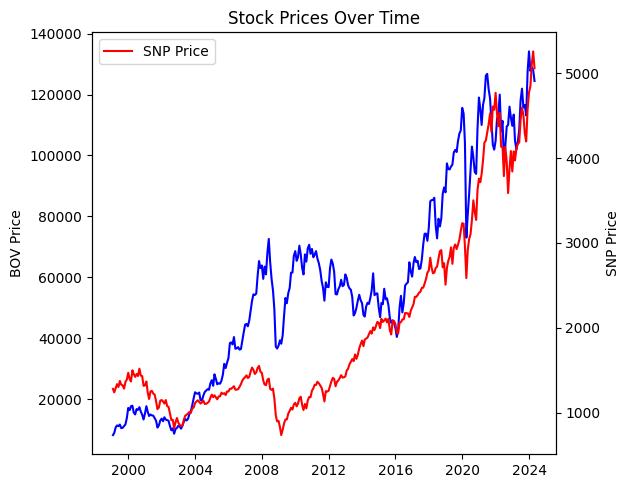

In [6]:
# Plotting
fig, ax1 = plt.subplots()

# Plot 'bovprice' on the primary y-axis
ax1.plot(date, df['bovprice'], color='blue', label='BOV Price')
ax1.set_ylabel('BOV Price')

# Create a secondary y-axis for 'snpprice'
ax2 = ax1.twinx()
ax2.plot(date, df['snpprice'], color='red', label='SNP Price')
ax2.set_ylabel('SNP Price')

plt.tight_layout()
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

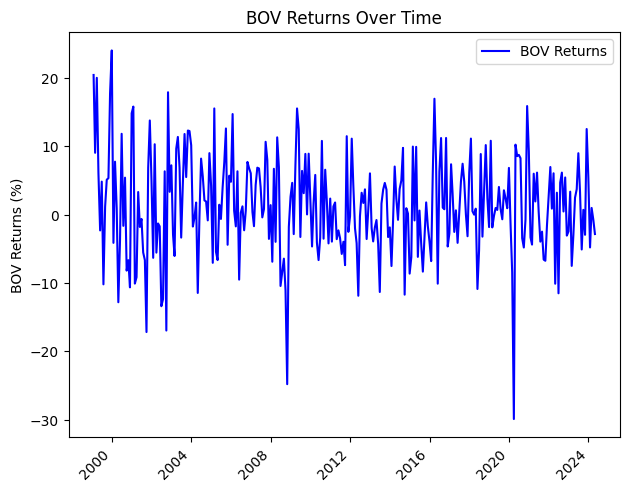

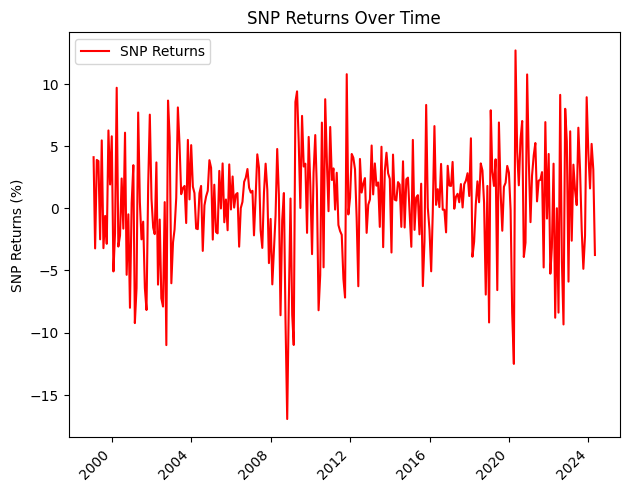

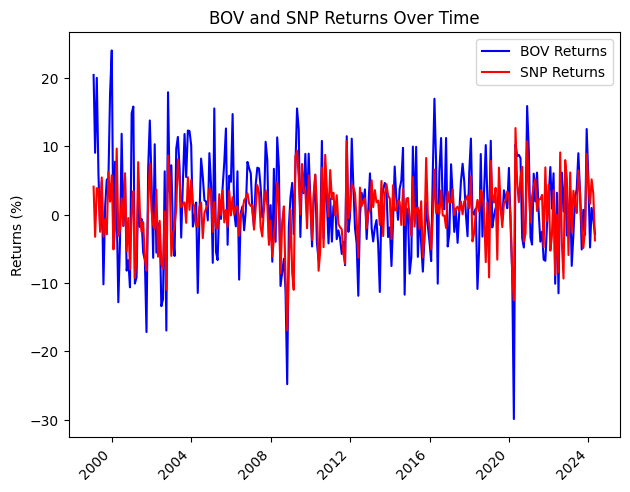

In [7]:
# Plotting BOV Returns
fig, ax1 = plt.subplots()
ax1.plot(date, df['bovreturn'], color='blue', label='BOV Returns')
ax1.set_ylabel('BOV Returns (%)')
plt.xticks(rotation=45, ha='right')  # Format x-axis labels
plt.tight_layout()
plt.title('BOV Returns Over Time')
plt.legend()
plt.show()
# Plotting SNP Returns
fig, ax2 = plt.subplots()
ax2.plot(date, df['snpreturn'], color='red', label='SNP Returns')
ax2.set_ylabel('SNP Returns (%)')
plt.xticks(rotation=45, ha='right')  # Format x-axis labels
plt.tight_layout()
plt.title('SNP Returns Over Time')
plt.legend()
plt.show()
# Plotting BOV Returns and SNP Returns on the same graph
fig, ax = plt.subplots()
ax.plot(date, df['bovreturn'], color='blue', label='BOV Returns')
ax.plot(date, df['snpreturn'], color='red', label='SNP Returns')
ax.set_ylabel('Returns (%)')
plt.xticks(rotation=45, ha='right')  # Format x-axis labels
plt.tight_layout()
plt.title('BOV and SNP Returns Over Time')
plt.legend()
plt.show()


<Figure size 1000x500 with 0 Axes>

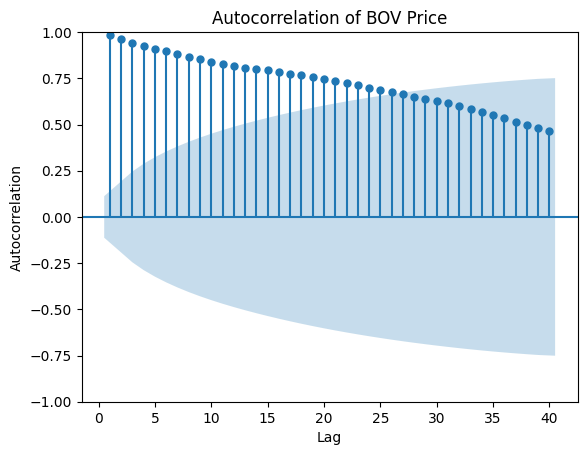

<Figure size 1000x500 with 0 Axes>

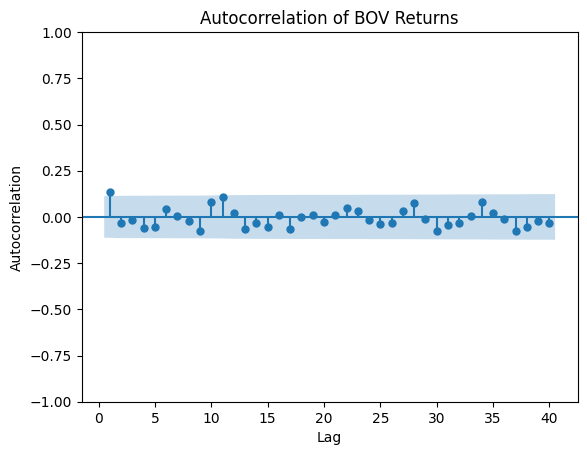

<Figure size 1000x500 with 0 Axes>

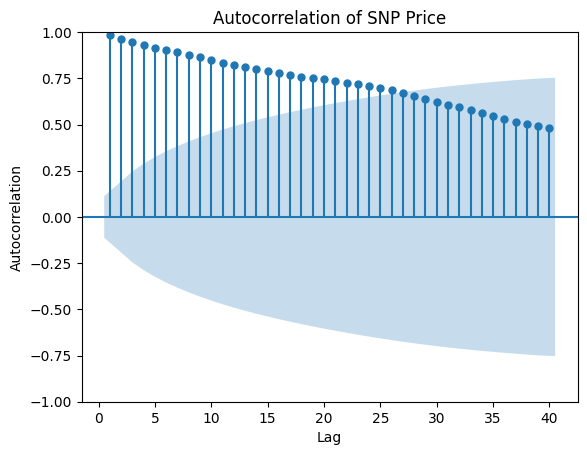

<Figure size 1000x500 with 0 Axes>

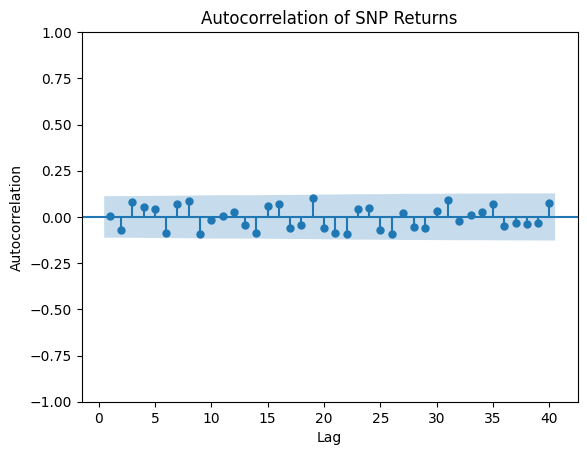

In [8]:
# Plot Correlogram for BOV Price
plt.figure(figsize=(10, 5))
plot_acf(df['bovprice'], lags=40, zero=False, title='Autocorrelation of BOV Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot Correlogram for BOV Returns
plt.figure(figsize=(10, 5))
plot_acf(df['bovreturn'].dropna(), lags=40, zero=False, title='Autocorrelation of BOV Returns')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot Correlogram for SNP Price
plt.figure(figsize=(10, 5))
plot_acf(df['snpprice'], lags=40, zero=False, title='Autocorrelation of SNP Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot Correlogram for SNP Returns
plt.figure(figsize=(10, 5))
plot_acf(df['snpreturn'].dropna(), lags=40, zero=False, title='Autocorrelation of SNP Returns')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

ADF Statistic: -15.306782517330083
p-value: 4.2393727166489125e-28
Critical Values:
	1%: -3.4524113009049935
	5%: -2.8712554127251764
	10%: -2.571946570731871
                            AutoReg Model Results                             
Dep. Variable:              bovreturn   No. Observations:                  300
Model:                     AutoReg(1)   Log Likelihood               -1010.367
Method:               Conditional MLE   S.D. of innovations              7.101
Date:                Thu, 02 May 2024   AIC                           2026.734
Time:                        20:24:35   BIC                           2037.835
Sample:                             1   HQIC                          2031.177
                                  300                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9440      0.415      2.273  

/Users/philiplacava/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


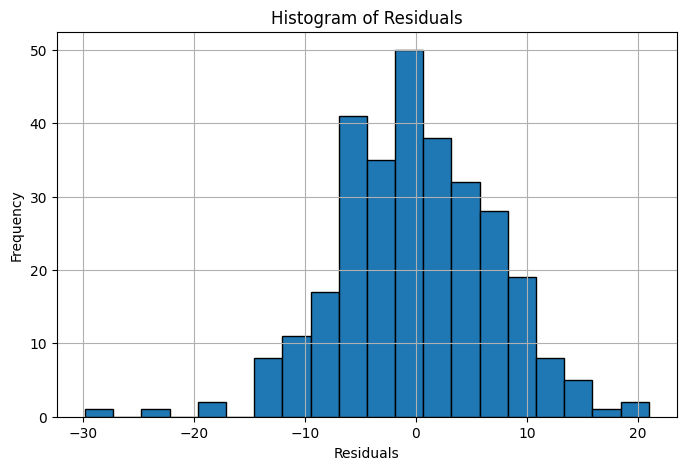

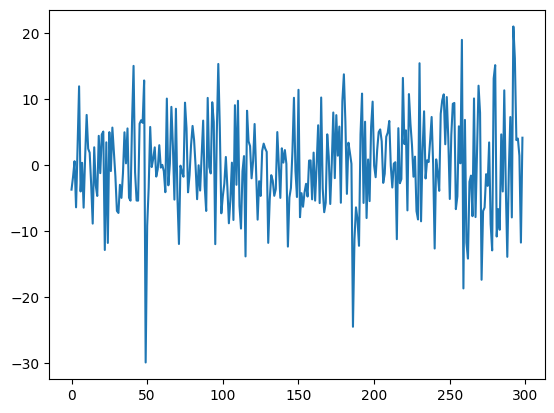

In [61]:
# White noise conditions
result = adfuller(df['bovreturn'], regression ='c')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')
    """
    Run Augmented Dickey-Fuller test on a given series.

    Parameters:
    series (pd.Series): Time series data.
    regression_type (str): Type of regression ('c', 'ct', 'ctt', 'nc') to include in the test.
                           'c' - Constant only (default)
                           'ct' - Constant and trend
                           'ctt' - Constant, linear and quadratic trend
                           'nc' - No constant, no trend
    """
# Define lag order (p) for the AR model
p = 1 # Example lag order

# Fit AR model
model = AutoReg(df['bovreturn'], lags=p)
results = model.fit()

# Print model summary
print(results.summary())
std_dev = df['bovreturn'].std()
print(f'Standard Deviation of bovreturn: {std_dev}')

residuals = results.resid
squaredresids = residuals**2 

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

plt.plot(residuals)

In [26]:
# Arch
model = AutoReg(squaredresids, lags=p)
results = model.fit()
print(results.summary())


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  303
Model:                     AutoReg(1)   Log Likelihood               -1772.639
Method:               Conditional MLE   S.D. of innovations             85.689
Date:                Thu, 02 May 2024   AIC                           3551.278
Time:                        19:35:32   BIC                           3562.409
Sample:                             1   HQIC                          3555.731
                                  303                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.6746      5.721      7.459      0.000      31.461      53.888
y.L1           0.1642      0.057      2.892      0.004       0.053       0.275
                                    Roots           

/Users/philiplacava/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
model = arch_model(df['bovreturn'], mean='AR', lags=1, vol='Garch', p=1, q=1, dist='normal')
results = model.fit(update_freq=5, disp='off', cov_type='robust')
print(results.summary())


                           AR - GARCH Model Results                           
Dep. Variable:              bovreturn   R-squared:                       0.019
Mean Model:                        AR   Adj. R-squared:                  0.015
Vol Model:                      GARCH   Log-Likelihood:               -1019.95
Distribution:                  Normal   AIC:                           2049.89
Method:            Maximum Likelihood   BIC:                           2068.46
                                        No. Observations:                  303
Date:                Thu, May 02 2024   Df Residuals:                      301
Time:                        19:44:41   Df Model:                            2
                                  Mean Model                                 
                   coef    std err          t      P>|t|     95.0% Conf. Int.
-----------------------------------------------------------------------------
Const            1.0162      0.394      2.579  9.895e-0

In [36]:

df['bovreturn_lag1'] = df['bovreturn'].shift(1)  # Creating a lagged version of `bovreturn`
df = df.dropna()

X = df[['bovreturn_lag1', 'snpreturn']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Define the dependent variable
y = df['bovreturn']

# Initialize and fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              bovreturn   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     91.53
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.08e-31
Time:                        19:56:37   Log-Likelihood:                -943.43
No. Observations:                 300   AIC:                             1893.
Df Residuals:                     297   BIC:                             1904.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4281      0.332      1.

In [59]:
from arch.univariate import ARX, GARCH, Normal

# Assuming df['bovreturn_lag1'] and df['snpreturn'] have been prepared and NaNs handled
X = df[['snpreturn']]

# Initialize the AR-GARCH model
# Specify the mean model as 'AR' and pass X as the exogenous variables (include the constant)
# Set p (lags for ARCH) and q (lags for GARCH) for the volatility model
# Define the mean model with exogenous regressors
mean_model = ARX(y=df['bovreturn'], lags=1, x=X)
mean_model.volatility = GARCH(p=0.00001, q=1)
mean_model.distribution = Normal()
# Fit the model
results = model.fit(update_freq=5)

# Print the results
print(results.summary())

Iteration:      5,   Func. Count:     47,   Neg. LLF: 936.9161922996514
Iteration:     10,   Func. Count:     86,   Neg. LLF: 936.0726499628781
Optimization terminated successfully    (Exit mode 0)
            Current function value: 936.0726472847418
            Iterations: 12
            Function evaluations: 99
            Gradient evaluations: 12
                          AR-X - GARCH Model Results                          
Dep. Variable:              bovreturn   R-squared:                       0.380
Mean Model:                      AR-X   Adj. R-squared:                  0.376
Vol Model:                      GARCH   Log-Likelihood:               -936.073
Distribution:                  Normal   AIC:                           1884.15
Method:            Maximum Likelihood   BIC:                           1906.35
                                        No. Observations:                  299
Date:                Thu, May 02 2024   Df Residuals:                      296
Time:          

In [66]:
def simulate_critical_values(num_simulations, T, r0):
    critical_values = []
    for _ in range(num_simulations):
        # Generate a unit root process
        series = np.random.normal(size=T).cumsum()
        # Placeholder for SADF/GSADF calculation: this should ideally be replaced
        # with a function that calculates the SADF/GSADF statistic.
        stat = adfuller(series, maxlag=int(r0*T), regression='c', autolag=None)[0]
        critical_values.append(stat)
    
    # Determine the 90%, 95%, and 99% critical values
    critical_values = np.percentile(critical_values, [90, 95, 99])
    return critical_values

# Example usage
num_simulations = 2000

critical_values = simulate_critical_values(num_simulations, T, r0)
print("Critical values at 90%, 95%, 99%:", critical_values)


Critical values at 90%, 95%, 99%: [-0.18863358  0.31423035  0.99485011]


In [67]:
# Initial settings for the SADF test window
r0 = 0.01 + 1.8 / np.sqrt(T)
swindow0 = int(np.floor(r0 * T))
dim = T - swindow0 + 1


In [74]:
# Calculate the SADF statistic
dateS = date[swindow0:]

badfs = np.zeros(dim)
for i in range(swindow0, T):
    result = adfuller(df['bovprice'][:i+1], maxlag=2, regression='c', autolag=None)
    badfs[i - swindow0] = result[0]
sadf = np.max(badfs)

print('The SADF statistic:', sadf)
print('The critical values:', critical_values)

The SADF statistic: 2.9824170959801433
The critical values: [-0.18863358  0.31423035  0.99485011]


In [75]:
# Calculate the Generalized SADF statistic
bsadfs = np.zeros(dim)
for r2 in range(swindow0, T):
    dim0 = r2 - swindow0 + 1
    rwadft = np.zeros(dim0)
    for r1 in range(dim0):
        result = adfuller(df['bovprice'][r1:r2+1], maxlag=2, regression='c', autolag=None)
        rwadft[r1] = result[0]
    bsadfs[r2 - swindow0] = np.max(rwadft)

gsadf = np.max(bsadfs)

print('The GSADF statistic:', gsadf)
print('The critical values:', critical_values)

The GSADF statistic: 3.378918732431357
The critical values: [-0.18863358  0.31423035  0.99485011]


In [77]:
print(len(dateS), len(bsadfs), len(badfs)) 


270 271 271


In [78]:
# Removing excess values not in the date range
badfs_plt = badfs[:-1]
bsadfs_plt = bsadfs[:-1]


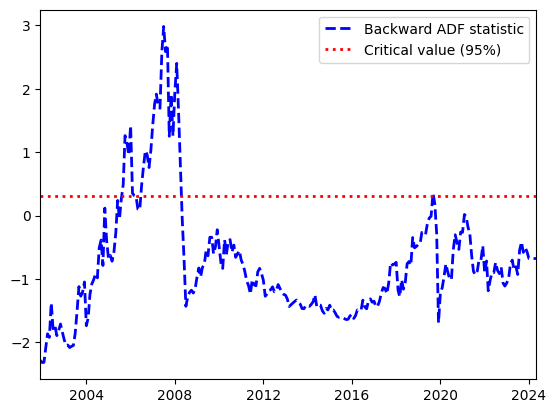

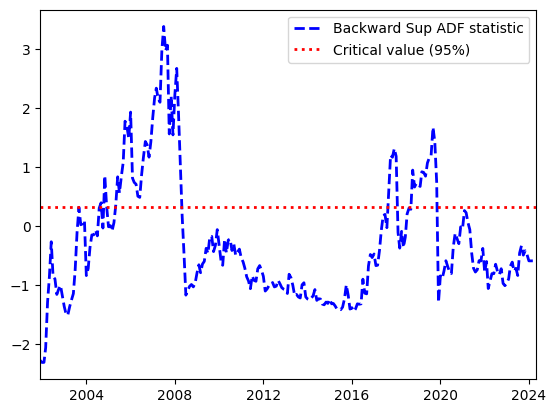

In [79]:
# Plot the backward ADF statistics
plt.figure(1)
plt.plot(dateS, badfs_plt, '--b', linewidth=2)
plt.plot(dateS, [critical_values[1]]*len(dateS), ':r', linewidth=2)
plt.xlim([dateS[0], dateS[-1]])
plt.legend(['Backward ADF statistic', 'Critical value (95%)'])



# Plot the Generalized SADF statistics
plt.figure(2)
plt.plot(dateS, bsadfs_plt, '--b', linewidth=2)
plt.plot(dateS, [critical_values[1]]*len(dateS), ':r', linewidth=2)
plt.xlim([dateS[0], dateS[-1]])
plt.legend(['Backward Sup ADF statistic', 'Critical value (95%)'])
